# Методы исследования характеристических свойств нейронных сетей с применением теоретико-игрового подхода

- **Теория**: И.В.Томилов ivan-tomilov3@yandex.ru
- **Реализация**: М.А.Зайцева maria@tail-call.ru
- **Поддержка CUDA**: А.Е.Григорьева admin@linkennt.ru
- **Ревизия**: 8

- **Другие ревизии**: [ссылка](https://disk.yandex.ru/d/aZozDpBlzh_z1A)
<!-- please do not append text into this block -->

- [ ] Добавить 2x больше эпох на датасетах, где был плохой перфоманс
- [x] Примешивать к целевой переменной на этапе обучения шум с амплитудой ~0,03 дисперсии
- [ ] Обучить модели без шума для сравнения
- [ ] Третий пункт был связан со стабильными распределениями и варьированием ɑ от 1 до 2 — этот стабильный шум надо тоже к целевой переменной примешивать

## Setup

In [7]:
from cgtnnlib.constants import LEARNING_RATE, RANDOM_STATE
import cgtnnlib.training as tr
import cgtnnlib.datasets as ds
from cgtnnlib.ExperimentParameters import ExperimentParameters
from cgtnnlib.NoiseGenerator import target_dispersion_scaled_noise, no_noise_generator


iterations = 10
epochs = 10
dataset = ds.datasets[2]
pp = [0.0, 0.5, 0.9]


datasets = [
    ds.datasets['StudentPerformanceFactors'],
    ds.datasets['wine_quality'],
]
ng_makers = [
    lambda dataset: no_noise_generator,
    lambda dataset: target_dispersion_scaled_noise(
        dataset=dataset,
        factor=0.03,
        random_seed=RANDOM_STATE + 1,
    ),
]


## Training

- both take ~5m 06s to train 10 iterations
- both on both noises: about ~10m

<hr>

- `ds.datasets['StudentPerformanceFactors']` takes ~2m 30s to train 10 iterations
- `ds.datasets['wine_quality']` takes ~2m 36s to train 10 iterations

In [5]:
for i, dataset in enumerate(datasets):
    for ng_maker in ng_makers:
        for p in pp:
            noise_generator = ng_maker(dataset)
            for iteration in range(iterations):
                experiment_params = ExperimentParameters(iteration, p=p)

                tr.create_and_train_model(
                    dataset,
                    epochs,
                    learning_rate=LEARNING_RATE,
                    dry_run=False,
                    p=p,
                    iteration=iteration,
                    noise_generator=noise_generator
                )

N=9 #6 gTDS6 p=0.5 E9/10 S434 Loss=0.0128@AugmentedReLUNetwork
create_and_train_model(): saved model to pth//cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.5_N9.pth
Report saved to pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.5_N9.json.
target_dispersion_scaled_noise(Dataset #6 {
  name: "wine_quality"
  learning_task: LearningTask(name='regression', criterion=MSELoss(), dtype=torch.float32)
  classes_count: 1
  target: "quality"
  _data: DatasetData(df=      fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...

## Evaluation

both take 42s

120 take 4m 10.9s

(need evaluation skip check??)

In [8]:
from cgtnnlib.EvaluationParameters import EvaluationParameters
from cgtnnlib.Report import Report
from cgtnnlib.nn.AugmentedReLUNetwork import AugmentedReLUNetwork
import cgtnnlib.evaluate as ev
import cgtnnlib.datasets as ds
import cgtnnlib.path as ph
from cgtnnlib.ExperimentParameters import ExperimentParameters


for i, dataset in enumerate(datasets):
    for ng_maker in ng_makers:
        for p in pp:
            noise_generator = ng_maker(dataset)

            for iteration in range(iterations):
                experiment_params = ExperimentParameters(iteration, p=p)
                
                eval_params = EvaluationParameters(
                    dataset=dataset,
                    model_path=ph.model_path(
                        dataset_number=dataset.number,
                        model_type=AugmentedReLUNetwork,
                        p=p,
                        iteration=iteration,
                        noise_generator=noise_generator,
                    ),
                    experiment_parameters=experiment_params,
                    report_key=ph.eval_report_key(
                        model_name=AugmentedReLUNetwork.__name__,
                        dataset_number=dataset.number,
                        p=p,
                        iteration=iteration,
                    )
                )
                
                report_name = ph.model_name(
                    dataset_number=dataset.number,
                    model_type=AugmentedReLUNetwork,
                    p=p,
                    iteration=iteration,
                    noise_generator=noise_generator
                )

                report = Report(
                    dir='pth/',
                    filename=report_name + '.json',
                    must_exist=True,
                )
                
                ev.eval_inner(
                    eval_params=eval_params,
                    constructor=AugmentedReLUNetwork,
                    report=report
                )
                
                report.save()

Evaluating model at pth//cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.9_N9.pth...
Report saved to pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.9_N9.json.


## Analysis

group cgtnn-3-AugmentedReLUNetwork-gNoNoise-0.0
rows <class 'pandas.core.frame.DataFrame'>
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.0_N8.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.0_N4.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.0_N5.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.0_N9.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.0_N2.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.0_N3.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.0_N0.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.0_N1.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.0_N6.json. Loading...
Report loaded.
Report found at pt

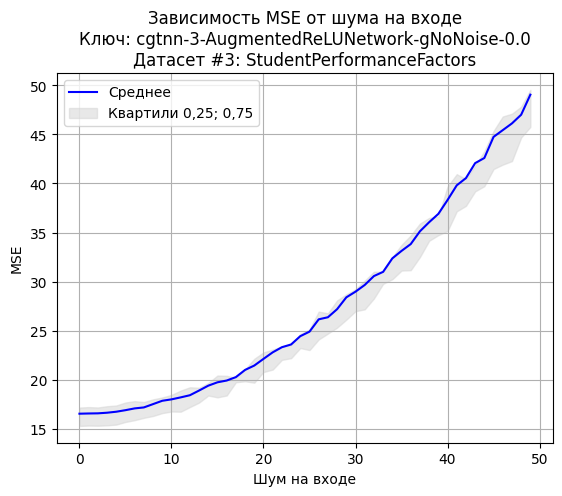

group cgtnn-3-AugmentedReLUNetwork-gNoNoise-0.5
rows <class 'pandas.core.frame.DataFrame'>
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.5_N7.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.5_N6.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.5_N1.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.5_N0.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.5_N3.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.5_N2.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.5_N9.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.5_N5.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.5_N4.json. Loading...
Report loaded.
Report found at pt

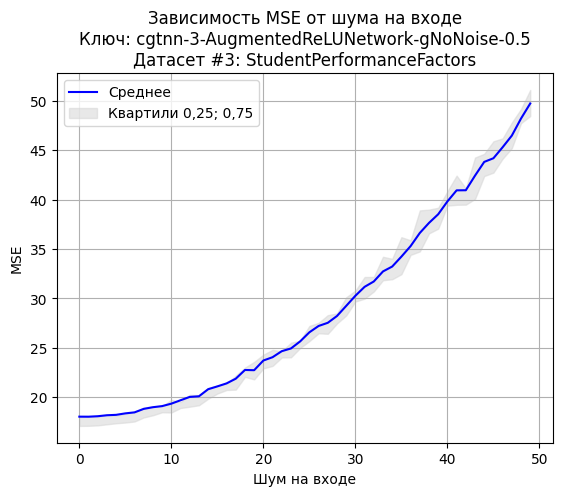

group cgtnn-3-AugmentedReLUNetwork-gNoNoise-0.9
rows <class 'pandas.core.frame.DataFrame'>
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.9_N4.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.9_N8.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.9_N9.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.9_N5.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.9_N2.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.9_N3.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.9_N0.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.9_N1.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gNoNoise-P0.9_N6.json. Loading...
Report loaded.
Report found at pt

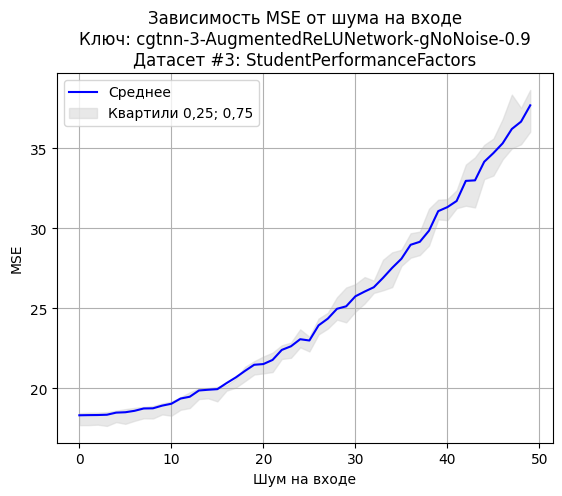

group cgtnn-3-AugmentedReLUNetwork-gTDS3-0.0
rows <class 'pandas.core.frame.DataFrame'>
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.0_N0.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.0_N1.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.0_N6.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.0_N7.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.0_N4.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.0_N8.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.0_N9.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.0_N5.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.0_N2.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwor

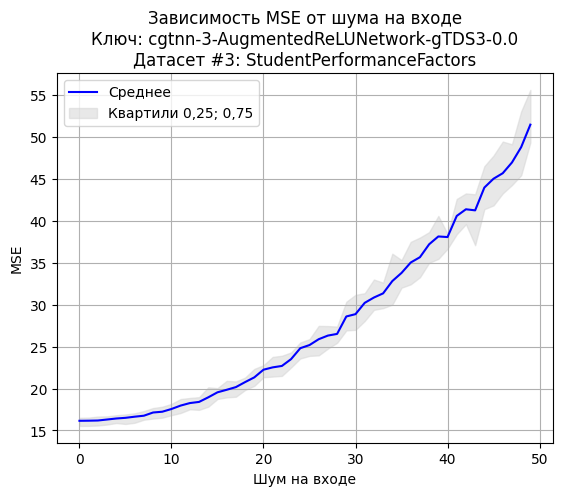

group cgtnn-3-AugmentedReLUNetwork-gTDS3-0.5
rows <class 'pandas.core.frame.DataFrame'>
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.5_N3.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.5_N2.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.5_N5.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.5_N9.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.5_N8.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.5_N4.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.5_N7.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.5_N6.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.5_N1.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwor

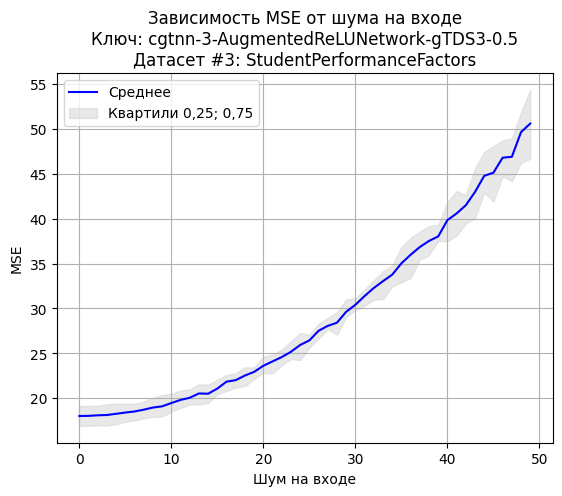

group cgtnn-3-AugmentedReLUNetwork-gTDS3-0.9
rows <class 'pandas.core.frame.DataFrame'>
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.9_N0.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.9_N1.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.9_N6.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.9_N7.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.9_N8.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.9_N4.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.9_N5.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.9_N9.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwork-gTDS3-P0.9_N2.json. Loading...
Report loaded.
Report found at pth/cgtnn-3Y-AugmentedReLUNetwor

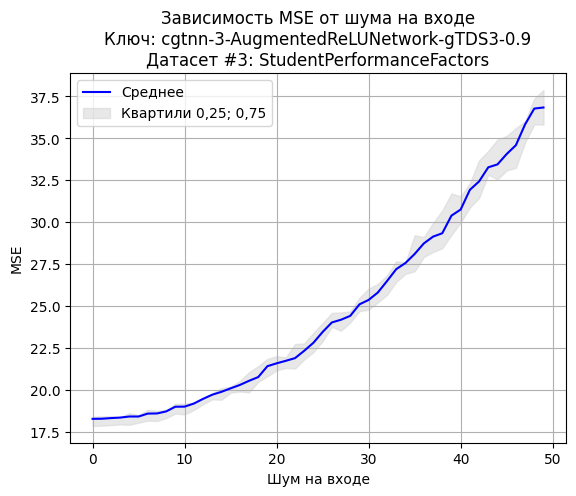

group cgtnn-6-AugmentedReLUNetwork-gNoNoise-0.0
rows <class 'pandas.core.frame.DataFrame'>
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.0_N4.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.0_N8.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.0_N9.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.0_N5.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.0_N2.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.0_N3.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.0_N0.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.0_N1.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.0_N6.json. Loading...
Report loaded.
Report found at pt

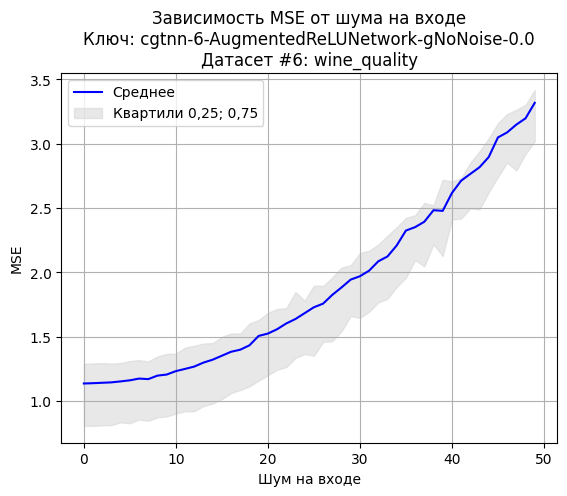

group cgtnn-6-AugmentedReLUNetwork-gNoNoise-0.5
rows <class 'pandas.core.frame.DataFrame'>
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.5_N7.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.5_N6.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.5_N1.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.5_N0.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.5_N3.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.5_N2.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.5_N5.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.5_N9.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.5_N8.json. Loading...
Report loaded.
Report found at pt

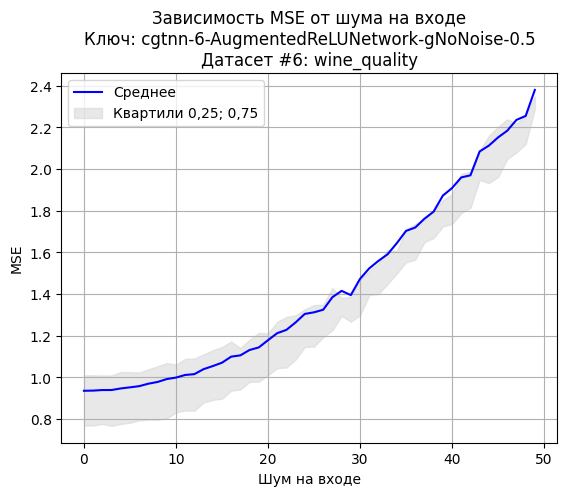

group cgtnn-6-AugmentedReLUNetwork-gNoNoise-0.9
rows <class 'pandas.core.frame.DataFrame'>
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.9_N8.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.9_N4.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.9_N5.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.9_N9.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.9_N2.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.9_N3.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.9_N0.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.9_N1.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gNoNoise-P0.9_N6.json. Loading...
Report loaded.
Report found at pt

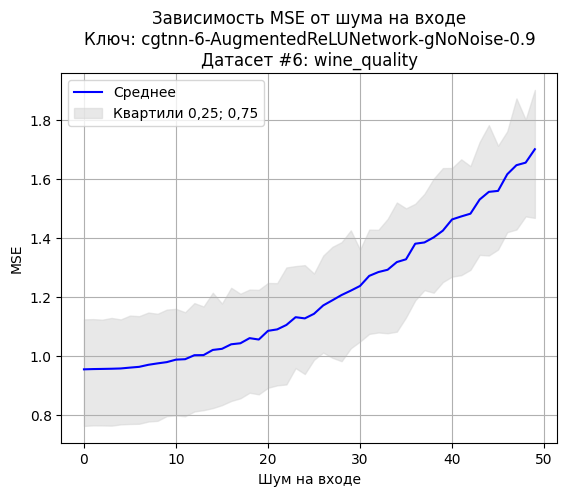

group cgtnn-6-AugmentedReLUNetwork-gTDS6-0.0
rows <class 'pandas.core.frame.DataFrame'>
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.0_N6.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.0_N7.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.0_N0.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.0_N1.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.0_N2.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.0_N3.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.0_N4.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.0_N8.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.0_N9.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwor

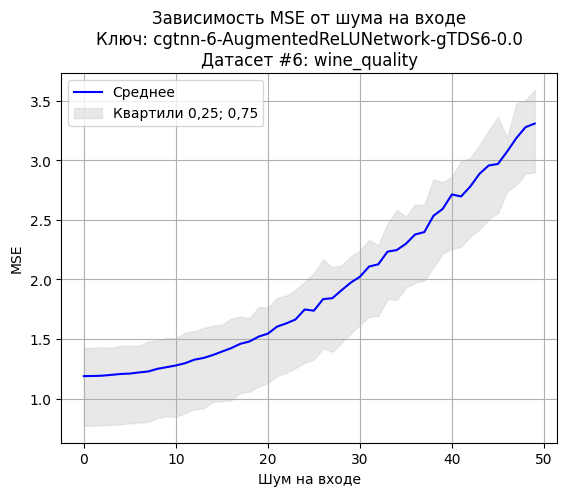

group cgtnn-6-AugmentedReLUNetwork-gTDS6-0.5
rows <class 'pandas.core.frame.DataFrame'>
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.5_N5.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.5_N9.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.5_N8.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.5_N4.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.5_N3.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.5_N2.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.5_N1.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.5_N0.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.5_N7.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwor

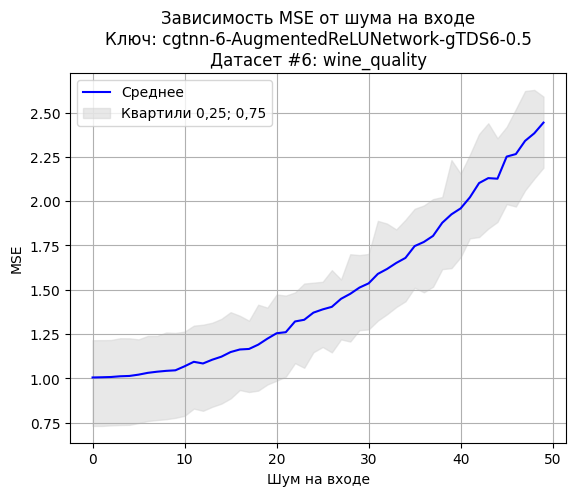

group cgtnn-6-AugmentedReLUNetwork-gTDS6-0.9
rows <class 'pandas.core.frame.DataFrame'>
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.9_N6.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.9_N7.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.9_N0.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.9_N1.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.9_N2.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.9_N3.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.9_N8.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.9_N4.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwork-gTDS6-P0.9_N5.json. Loading...
Report loaded.
Report found at pth/cgtnn-6Y-AugmentedReLUNetwor

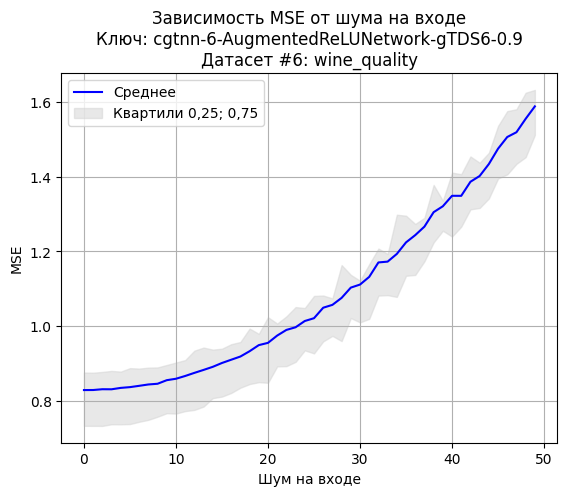

In [9]:
import re

import pandas as pd

import matplotlib.pyplot as plt

from cgtnnlib.Report import get_reports_list, Report
from cgtnnlib.analyze import plot_deviant_curves_on_ax_or_plt


reports = [
    re.split(r"[-_]", filename.rstrip('.json')) + [filename]
    for filename in get_reports_list()
]

df = pd.DataFrame(reports, columns=['project', 'dataset', 'model_class', 'noise_generator', 'p', 'iteration', 'filename'])
df['dataset'] = df['dataset'].apply(lambda x: int(x.rstrip('Y')))
df['p'] = df['p'].apply(lambda x: float(x.lstrip('P')))
df['iteration'] = df['iteration'].apply(lambda x: int(x.lstrip('N')))

def dataset(row):
    return f"{row.project}-{row.dataset}-{row.model_class}-{row.noise_generator}-{row.p}"

df['grouping_key'] = df.apply(dataset, axis=1)


def summarize_series_list(series_list: list[pd.Series]):
    df = pd.DataFrame(series_list).T

    summary_df = pd.DataFrame({
        0.25: df.quantile(0.25, axis=1),
        0.75: df.quantile(0.75, axis=1),
        'mean': df.mean(axis=1),
    })

    return summary_df


grouped = df.groupby('grouping_key')
for dataset, rows in grouped:
    print('group', dataset)
    print('rows', type(rows))

    losses: list[pd.DataFrame] = []
    evals: list[pd.DataFrame] = []

    reports = [
        Report(dir='pth/', filename=filename)
        for filename in rows['filename']
    ]
    
    # curve = summarize_series_list(
    #     list(map(lambda x: pd.Series(x.get('loss')), reports))
    # )

    curve = summarize_series_list(
        list(map(lambda x: pd.DataFrame(x.get('eval'))['mse'], reports))
    )
    
    dataset_name = reports[0].get('dataset').get('name')
    dataset_number = reports[0].get('dataset').get('number')

    plot_deviant_curves_on_ax_or_plt(
        ax_or_plt=plt,
        models=[{
            'curve': curve,
            'color': 'blue',
            'label': 'Среднее',
            'quantiles_color': 'lightgray',
            'quantiles_label': 'Квартили 0,25; 0,75',
        }],
        title='\n'.join([
            # 'Кривая потерь, обучение с +0.03 шумом на входе',
            'Зависимость MSE от шума на входе',
            'Ключ: ' + dataset,
            f'Датасет #{dataset_number}: {dataset_name}'
        ]),
        xlabel='Шум на входе',
        ylabel='MSE',
        quantiles_alpha=0.5,
    )
    
    plt.grid()
    plt.show()
